### 1. Introduction:
This project is part from Udicity data wrangling course, it will gather tweets data for tag WeRateDogs from various sources. Then we will perform wrangling and analysis for this data.

### 2. Gathering Data:
dat will be gathered from three sources: twitter API, twitter_enchanced_archive.csv, image_predictions.tsv

#### 2.1 Gathering Twitter API data

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [1]:
#line by line method or reading API file
import json
import pandas as pd

df_list=[]
with open ("tweet_json.txt", 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)
    
        
api_df = pd.DataFrame(df_list)
api_df = api_df[['id_str', 'retweet_count', 'favorite_count']]
#api_df.info()

In [2]:
#file was downloaded from the class resources as API keys not activated yet
api_df = pd.read_json('tweet_json.txt', lines=True)
api_df = api_df[['id_str', 'retweet_count', 'favorite_count']]

#### 2.2 Gathering  twitter-archive-enhanced.csv data:

In [3]:
#open WeRateDogs Twitter Archive
import pandas as pd
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
#archive_df.info()

#### 2.3 Gathering image_predictions.tsv data:

In [4]:
#download the neural network image rating using request
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
images_df = pd.read_csv('image_predictions.tsv', sep='\t')

#test
#images_df.to_csv('images_df.csv', index=False)

In [5]:
#downloading the url directly with pandas
images_df = pd.read_csv(url, sep='\t')

In [6]:
#Save copy from main data frames
archive_df_clean = archive_df.copy()
images_df_clean = images_df.copy()
api_df_clean = api_df.copy()

### 3. Assessing data visuall and progromatically:

Both visual and progromatic data assessing will be performed, data size is suitable to be checked with Excel or Google spreadsheets

### 3.1 Assessing data visually

In [7]:
#assessing archive_df_clean data visually.
#check data on spread sheet visually is much better than jupyter notebook
#Please download and open the the file archive_df_clean.csv with Excel.
#data size is suitable for checking with Excel.
archive_df_clean.head()
archive_df_clean.tail()
#archive_df_clean.to_csv('archive_df_clean.csv')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
#assessing archive_df_clean data visually.
images_df_clean.head()
images_df_clean.tail()
#images_df_clean.to_csv('images_df_clean.csv')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [9]:
#assessing archive_df_clean data visually.
api_df_clean.head()
api_df_clean.tail()
#api_df_clean.to_csv('api_df_clean.csv')

,id_str,retweet_count,favorite_count
2349,666049248165822464,41,111
2350,666044226329800704,147,311
2351,666033412701032448,47,128
2352,666029285002620928,48,132
2353,666020888022790144,532,2535


### 3.2 Assessing data progromatically

In [10]:
archive_df_clean.info()
archive_df_clean.describe()
archive_df_clean[archive_df_clean.duplicated()]


print(100*'-')
images_df_clean.info()
images_df_clean.describe()
images_df_clean[images_df_clean.duplicated()]

print(100*'-')
api_df_clean.info()
api_df_clean.describe()
api_df_clean[api_df_clean.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,id_str,retweet_count,favorite_count


### 3.4   Quality Issues file "twitter-archive-enhanced":
<br>1- Column: **rating_numerator** should be float type to extract ratings with floats correctly. 
<br>2- Column: **tweet_id**data type is float, ID should be string for ID.
<br>3- Column **name** missing data for 745 cell with non value.
<br>4- Column **"expanded_urls"** missing data 60 cell.
delete rows without images
<br>5- Remove any retweets **retweeted_status_id** or  or tweets without images in them.
<br>6- Remove any retweets with values on **replies in_reply_to_status_id** column.
<br>7- Column **timestamp**, datatype is sting it should be converted for timedate format.
<br>8- Column **"rating_nominator"** inconsisten data, 22 values are greater than 24 which are far from the average ratings.
<br>9- Column **"rating_denominator"** inconsisten data, vaulues are not exactly 10, some values above some below. Which is not valid for our scale.
<br>10- Columns **"doggo, floofer, pupper, puppo"** should be only one value selected, some row have multiple selection of these.

### 3.5 Tidness Issues:

<br>1- Tweets data from API should be all merged into one table, I have extracted important data from **api_df** and merged two columns **'retweet_count'**, **'favorite_count'** using **'id_str column** as the key.
<br>2- In file twitter-archive-enchanced four cloumns "doggo, floofer, pupper, puppo" should be melterd on one column.




### 4. Cleaning:

#### 4.1 Converting datatype rating_numerator to float :
##### 4.1.1 Define:
rating_numerator should be float type to extract ratings with floats correctly
##### 4.1.2 Code:

In [11]:
#Column: rating_numerator should be float type to extract ratings with floats correctly.
archive_df_clean[archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].apply(float)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


##### 4.1.3 Test:

In [12]:
archive_df_clean.rating_numerator.dtypes 

dtype('float64')

#### 4.2 Tweet_id datatype to str:
##### 4.2.1 Define:
For merging between API_df and Archive_df, Tweet_ID is float in Archive_df, While it is sting on the API file. So we have converted both to string for easier merging.
##### 4.2.2 Code

In [13]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].apply(str)
api_df_clean['id_str'] = api_df_clean['id_str'].apply(str)

#### 4.2.3Test

In [14]:
api_df_clean['id_str'].dtypes

dtype('O')

#### 4.3 Merging data from api_df_clean and archive_df_clean into  one data frame df_merged:
##### 4.3.1 Define:
Merge data from api_df and twitter_archive into one data frame to avoid repeating cleaning steps.
##### 4.3.2 Code:

In [15]:
df_merged = archive_df_clean.merge(api_df_clean, how='inner', left_on='tweet_id', right_on='id_str')

##### 4.3.3 Test

In [16]:
list(df_merged['id_str']) == list(df_merged['tweet_id'])
#we dropped the extra ID columns after completing testing with it
df_merged = df_merged.drop('id_str', 1)

#### 4.4 Fixing missing and incorrect names of dogs:
##### 4.4.1 Define:
dog names are missing data for 745 cell with none value. We have used regular expression to repeat the extraction process for any additional names found in text column. Rows without name extracted have been converted to Nan using np.nan for easy operation on the data.
##### 4.4.2 Code:

In [17]:
import re
import numpy as np

#try to Extract additional dogs name from text column for names that contains 'a' or 'an'
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_merged.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df_merged.loc[index,'name'] = df_merged.loc[index,'name'].replace('a', c_name)
            
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df_merged.loc[index,'name'] = df_merged.loc[index,'name'].replace('an', c_name)
            
        #replace the dog name 'a' or 'an' values with np.nan    
        elif row['name'] == 'None':
            df_merged.loc[index,'name'] = np.nan    
        
    except IndexError:
        df_merged.loc[index,'name'] = np.nan

#df_merged.name.value_counts(dropna = False)

##### 4.4.3Testing

In [18]:
df_merged[(df_merged.name == 'a') | (df_merged.name == 'an')| (df_merged.name == 'None') ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


In [19]:
df_merged.loc[(df_merged[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
116,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13.0,10,NaN,doggo,None,None,puppo,19196,47844
123,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11.0,10,NaN,doggo,floofer,None,None,3433,17169
327,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,None,pupper,None,2429,8992
406,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,None,pupper,None,2561,8735
528,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,None,pupper,None,2173,6620
580,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5.0,10,NaN,doggo,None,pupper,None,1265,4849
654,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10,just,doggo,None,pupper,None,3520,10342
689,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12.0,10,NaN,doggo,None,pupper,None,17621,44619


#### 4.5 Dropping "expanded_urls" with Nan value:
##### 4.5.1 Define: 
"expanded_urls" has nearly 60 cell empty, these empty cells means that the tweet does not have an image attached to it, so we have dropped empty rows from the data frame as it is required in the project all tweets have images.
##### 4.5.2 Code:

In [20]:
df_merged = df_merged[df_merged['expanded_urls'].notna()]

##### 4.5.3 Testing:

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 1517
Data columns (total 19 columns):
tweet_id                      1481 non-null object
in_reply_to_status_id         15 non-null float64
in_reply_to_user_id           15 non-null float64
timestamp                     1481 non-null object
source                        1481 non-null object
text                          1481 non-null object
retweeted_status_id           97 non-null float64
retweeted_status_user_id      97 non-null float64
retweeted_status_timestamp    97 non-null object
expanded_urls                 1481 non-null object
rating_numerator              1481 non-null float64
rating_denominator            1481 non-null int64
name                          991 non-null object
doggo                         1481 non-null object
floofer                       1481 non-null object
pupper                        1481 non-null object
puppo                         1481 non-null object
retweet_count                 148

#### 4.6 Dropping "retweeted_status_id" with Nan value:
#### 4.6.1 Define:
"retweeted_status_id" this column indicates that the tweet is not original and its retweeted, so we have dropped rows that have values in that column.
#### 4.6.2 Code:

In [22]:
df_merged = df_merged[df_merged['retweeted_status_id'].isna()]

##### 4.6.3 Testing:

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 1517
Data columns (total 19 columns):
tweet_id                      1384 non-null object
in_reply_to_status_id         15 non-null float64
in_reply_to_user_id           15 non-null float64
timestamp                     1384 non-null object
source                        1384 non-null object
text                          1384 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1384 non-null object
rating_numerator              1384 non-null float64
rating_denominator            1384 non-null int64
name                          933 non-null object
doggo                         1384 non-null object
floofer                       1384 non-null object
pupper                        1384 non-null object
puppo                         1384 non-null object
retweet_count                 1384 n

#### 4.7 Drop retweets with in_reply_to_status_id.
##### 4.7.1Define:
they are tweets without images in them.
##### 4.7.2 Code:

In [24]:
df_merged = df_merged[df_merged['in_reply_to_status_id'].isna()]

##### 4.7.3 Test:

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1517
Data columns (total 19 columns):
tweet_id                      1369 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1369 non-null object
source                        1369 non-null object
text                          1369 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1369 non-null object
rating_numerator              1369 non-null float64
rating_denominator            1369 non-null int64
name                          932 non-null object
doggo                         1369 non-null object
floofer                       1369 non-null object
pupper                        1369 non-null object
puppo                         1369 non-null object
retweet_count                 1369 non

#### 4.8 Convert timestamp into datetime format:
##### 4.8.1 Define:
Column timestamp, datatype is sting it was converted for timedate format for easier tweet time analysis process.
##### 4.8.2 Code:

In [26]:
df_merged['timestamp'] = df_merged['timestamp'].apply(str)
df_merged['timestamp'] = df_merged['timestamp'].str.replace(' +0000','')
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

##### 4.8.3 Test:

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1517
Data columns (total 19 columns):
tweet_id                      1369 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1369 non-null datetime64[ns]
source                        1369 non-null object
text                          1369 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1369 non-null object
rating_numerator              1369 non-null float64
rating_denominator            1369 non-null int64
name                          932 non-null object
doggo                         1369 non-null object
floofer                       1369 non-null object
pupper                        1369 non-null object
puppo                         1369 non-null object
retweet_count                 

#### 4.9 Fixing rating_nominator data:
##### 4.9.1 Define:
Column "rating_nominator" inconsistent data, 22 values are greater than 24 which are far from the average ratings. Those inconsistent 22 values have been filled by the median of the columns data, we have not used mean as it is already highly deviated due to the previously mentioned extremely large values like '1746'.
##### 4.9.2 Code:

In [28]:
df_merged['rating_numerator'].describe()

for index, row in df_merged.iterrows():
    #determined 24 as maximum value from visual check, few values above it.
    median = df_merged['rating_numerator'].median()
    if row['rating_numerator'] >= 24:
            df_merged.loc[index,'rating_numerator'] = df_merged.loc[index,'rating_numerator'].fill(median)

##### 4.9.3 Test

In [29]:
df_merged['rating_numerator'].value_counts()      

10.0    314
12.0    312
11.0    261
13.0    175
9.0      97
8.0      67
7.0      35
6.0      22
14.0     20
5.0      19
4.0      13
3.0      13
2.0       5
1.0       4
Name: rating_numerator, dtype: int64

#### 4.10 Fixing rating_denominator data:
##### 4.10.1 Define:
Column "rating_denominator" inconsistent data, values are not exactly 10, some values above some below. Which is not valid for our scale. Scales has a denominator of 10, we have refilled such cells with 10 as denominator.
##### 4.10.2 Code:

In [30]:
df_merged['rating_denominator'].value_counts() 

for index, row in df_merged.iterrows():
    #determined 40 as maximum value from visual check, few values above it.
    denominator = 10
    if row['rating_denominator'] != 10:
            df_merged.loc[index,'rating_denominator'] = df_merged.loc[index,'rating_denominator'].fill(denominator)

##### 4.10.3 Test:

In [31]:
df_merged['rating_denominator'].value_counts()

10.0    1359
Name: rating_denominator, dtype: int64

#### 4.11 Merging dog stage four columns into one column:
##### 4.11.1 Define:
Columns "doggo, floofer, pupper, puppo" should be only one value selected, some row have multiple selection of these. Rows with duplicated dog age input has been fixed to include only one age, replacement has been put to multiple if tweet has more than one dog stage. rows without age data has been filled with np.nan instead of None of easy filtering and data assessing.

The Four cloumns "doggo, floofer, pupper, puppo" have been merged on one column called 'age'
##### 4.11.2 Code:

In [32]:
names = ['doggo', 'floofer', 'pupper', 'puppo']

#I have replaced None with "" instead of np.nan to make merging easy
df_merged[names] = df_merged[names].replace("None", "")


#merging four columns into one:
#df_merged['age'] = df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo
df_merged['age'] = df_merged[names].apply(lambda x: ''.join(x.values.astype(str)), axis=1)


#drop old columns after merging data
df_merged.drop(names, axis = 1, inplace=True)

#replace "" with np.nan for better filtering and analysis
df_merged.age.replace("", np.nan, inplace=True)

#check data
df_merged.to_csv('test.csv')


#replacing combined ages with multiple as single value for
age_list = list(df_merged.age.unique())
cleaning_items = list(set(age_list) - set(names))
for i in cleaning_items:
    if i != np.nan:
        df_merged['age'] = df_merged['age'].dropna().replace(i, 'multiple')
    



##### 4.11.3 Test

In [33]:
df_merged['age'].unique()

array([nan, 'pupper', 'puppo', 'doggo', 'multiple', 'floofer'], dtype=object)

#### 4.12 dropping columns with empty data:
##### 4.12.1 Define:
Empty unnecessary rows have been dropped from the dataframe df_merged like columns ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'].
##### 4.12.2 Code:

In [34]:
#drop empty columns from df_merged:
empty_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                'retweeted_status_user_id', 'retweeted_status_timestamp']
df_merged.drop(empty_columns, axis=1, inplace=True)

##### 4.12.3 Test:

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1517
Data columns (total 11 columns):
tweet_id              1369 non-null object
timestamp             1369 non-null datetime64[ns]
source                1369 non-null object
text                  1369 non-null object
expanded_urls         1369 non-null object
rating_numerator      1357 non-null float64
rating_denominator    1359 non-null float64
name                  932 non-null object
retweet_count         1369 non-null int64
favorite_count        1369 non-null int64
age                   225 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 168.3+ KB


### 5. Data Storage: 
data has been store into two data files, twitter_archive_master.csv and images_df.csv

In [36]:
#Storing
df_merged.to_csv('twitter_archive_master.csv', index=False)
images_df.to_csv('images_df.csv', index=False)


### 6. Reporting on data wrangling efforts:


#### 6.1 Data Gathering:
data has been gather as per project specifications

#### 6.2 Data Cleaning:
1- rating_numerator should be float type to extract ratings with floats correctly.
2- tweet_id data type is float, it should be string for easy merging data from api_df with data on twitter_rchive_enhanced using tweet_id as key for merging. 

3- Merging data from api_df_clean and archive_df_clean into one data frame df_merged:Tweets data from API should be all merged into one table, I have extracted important data from api_df columns'retweet_count', 'favorite_count' and merged them using 'id_str column as the key in to df_merged data frame.

4- dog names are missing data for 745 cell with none value. We have used regular expression to repeat the extraction process for any additional names found in text column. Rows without name extracted have been converted to Nan using np.nan for easy operation on the data.

5- "expanded_urls" has nearly 60 cell empty, these empty cells means that the tweet does not have an image attached to it, so we have dropped empty rows from the data frame as it is required in the project all tweets have images.

6- "retweeted_status_id" this column indicates that the tweet is not original and its retweeted, so we have dropped rows that have values in that column.

7- in_reply_to_status_id: this means tweets in not original, so we have dropped rows that have values in that column.

8- Column timestamp, datatype is sting it was converted for timedate format for easier tweet time analysis process.

9- Column "rating_nominator" inconsistent data, 22 values are greater than 24 which are far from the average ratings. Those inconsistent 22 values have been filled by the median of the columns data, we have not used mean as it is already highly deviated due to the previously mentioned extremely large values like '1746'. 

10- Column "rating_denominator" inconsistent data, values are not exactly 10, some values above some below. Which is not valid for our scale. Scales has a denominator of 10, we have refilled such cells with 10 as denominator.

11- Columns "doggo, floofer, pupper, puppo" should be only one value selected, some row have multiple selection of these. Rows with duplicated dog age input has been fixed to include only one age, replacement has been put to multiple if tweet has more than one dog stage. rows without age data has been filled with np.nan instead of None of easy filtering and data assessing

The Four cloumns "doggo, floofer, pupper, puppo" have been merged on one column called 'age'

12- Empty unnecessary rows have been dropped from the dataframe df_merged like columns ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                'retweeted_status_user_id', 'retweeted_status_timestamp'].
                
13- data has been store into two data files, twitter_archive_master.csv and images_df.csv


### 7. Reporting data analyses and visualizations:

In [37]:
#time of twitting:
df_merged['month'] = df_merged['timestamp'].dt.month
df_merged['year'] = df_merged['timestamp'].dt.year
df_merged['hour'] = df_merged['timestamp'].dt.hour
df_merged['day_name'] = df_merged['timestamp'].dt.day_name()

df_merged.hist(figsize=(8,8));



From df_merged Histogram for (Tweet publish hours, Tweet publish month, Tweet publishing year, numerator):

Tweet publish hours: most of tweets was published after hour 15:00 till 5:00 AM, peak hour was from 12:00 to 1:00 AM.

Tweet publish month: most of tweet are punlished in winter/cold months like december and jan.

Tweet publishing year: WeRateDogs trend increased from 2015 to 2016 then begins to fall  at 2017, trend peak was at 2016.

most of rating numerator was above 10 while denominator has a fixed value of 10.

Text(0.5,1,'tweets count in week days')

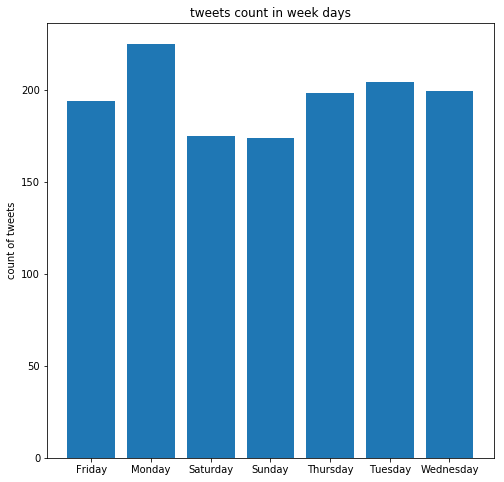

In [38]:
#distribution of tweets in week days.
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
values = df_merged['day_name'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8));
plt.bar(week_days, values);

plt.ylabel('count of tweets')
plt.title('tweets count in week days')
#plt.savefig('tweets count in week days.png')


from figure tweets count in week days: Publishing tweets was least at weekends Sat, Sun. its peak was on Monday at the beginning of the week.

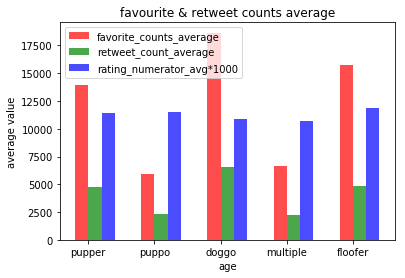

In [39]:
favorite_count = df_merged.groupby('age').favorite_count.mean()
retweet_count  = df_merged.groupby('age').retweet_count.mean()
numerator_avg = df_merged.groupby('age').rating_numerator.mean()


x1 = np.arange(len(list(df_merged.age.dropna().unique()))) #horizontal axes
x2 = np.arange(len(list(df_merged.age.dropna().unique())))
x3 = np.arange(len(list(df_merged.age.dropna().unique())))
width = .2      # the width of the bars

favorite_count = plt.bar(x1, favorite_count, width, color='r', alpha=.7, label='favorite_counts_average')
retweet_count = plt.bar(x2 + width, retweet_count, width , color='g', alpha=.7, label='retweet_count_average')
numerator_avg = plt.bar(x3 + 2*width, numerator_avg*1000, width , color='b', alpha=.7, label='rating_numerator_avg*1000')


plt.ylabel('average value')
plt.xlabel('age')
plt.title('favourite & retweet counts average')
locations = x1 + width / 2  # xtick location
labels = list(df_merged.age.dropna().unique())  # xtick labels
plt.xticks(locations, labels)
plt.legend()
#plt.savefig('favourite & retweet counts average')

In [40]:
#plt.savefig('favourite & retweet counts average')

favorite & retweet counts average figure illustrate the average retweet and favorite for 
each doge age ('doggo', 'floofer', 'pupper', 'puppo'). it is appear that people prefer to hit
favorite than retweeting liked images. all of favorite images average are greater than retweet
count. 

Favorite count and retweet counts directly proportional to each other, values with higher favorite
counts have higher retweet count. dog ages floofer and pupper are the most preferred images.

rating_numerator_avg has been added to the previous figure to compare rating numerator with retweet and
favorite count. numerator was multiplied by 1000 on the figure plotting to put data on same Y axis as the
real numerator values was much less than favorite and retweet counts.

it was found that rating numerator does not show any difference between dogs ages,
all of ages have similar average rating.

rating does not effectively reflex the user interest in the image like retweet and favorite. retweet and
favorite seems more reliable in evaluating image quality.
